In [11]:
from duckduckgo_search import DDGS 
from fastcore.all import *

# def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
# import time, json

In [12]:
# urls = search_images('sugarcane smut', max_images=1)
# urls[0]

In [17]:
from fastdownload import download_url
# dest = 'sugarcane-smut.jpg'
# download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
# im = Image.open(dest)
# im.to_thumb(256,256)

In [18]:
# searches = 'healthy sugarcane leaf images', 'sugarcane wilt disease images', 'sugarcane smut disease images', 'sugarcane red rot'
# path = Path('Sugarcane')

# for o in searches:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
#     time.sleep(5)
#     resize_images(path/o, max_size=400, dest=path/o)

In [19]:
# failed = verify_images(get_image_files(path))
# failed.map(Path.unlink)
# len(failed)

In [21]:
path = '/kaggle/input/sugarcane-leaf-disease-dataset'

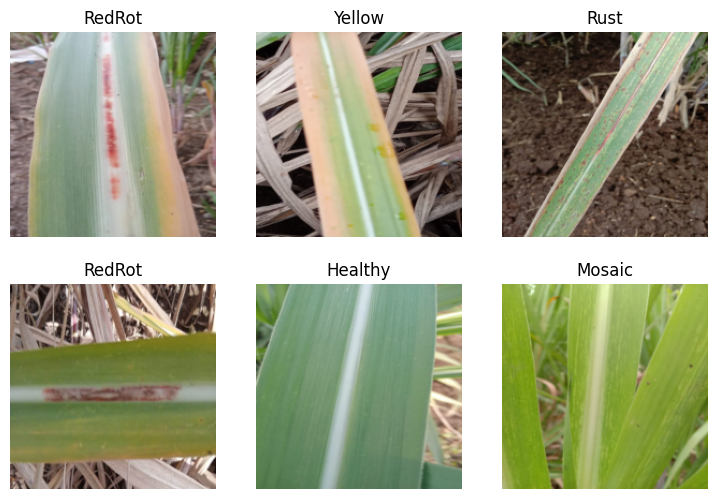

In [22]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 65.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.503745,0.623238,0.220238,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.549289,0.312676,0.115079,00:21
1,0.276615,0.285590,0.087302,00:16
2,0.162658,0.196931,0.051587,00:16
3,0.093309,0.203251,0.063492,00:16
4,0.048183,0.188541,0.059524,00:16


In [27]:
dest = 'redrootsc.jpg'
download_url('https://agritech.tnau.ac.in/crop_protection/images/sugarcane_diseases/4.1.jpg', dest, show_progress=False)

Path('redrootsc.jpg')

In [40]:
is_healthy,_,probs = learn.predict(PILImage.create('redrootsc.jpg'))
print(f"This is a: {is_healthy}.")
# print(f"Probability it's a healthy leaf: {probs[0]:.4f}")
# print(probs)

This is a: Yellow.


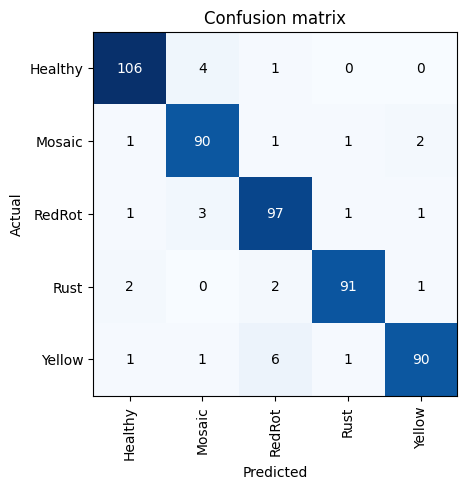

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [42]:
learn.export('sugarcane.pkl')